# 1 - Introduction

The idea of this notebook is to use the [Springer Nature API](https://dev.springernature.com/) to do some exploratory data analysis of scientific publications made by different countries. To focus more on the analysis and less on code, the functions used here were defined in a separate python file (functions.py), that can be found in this same repository. 

It is important to mention that the analysis presented here is not general, but restricted to the publications made on Springer Nature scientific journals. A broader exploration would require gathering information of journals from all other academic publishers, which do not have (as far as I know) such a simple API. If you know where/how to easily get similar information from other journals, please feel free to contact me.

\[Edit\]: Right before pushing this repository to GitHub I discovered the [Scopus API](https://dev.elsevier.com/), which seems to have useful information about publications from all relevant scientific journals. However, they do not provide metadata like the Springer Nature API. Hence, maybe I come back here to continue this project.

# 2 - Collecting the data

In [1]:
#Importing modules
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *

sns.set()
my_key = 'your API key here'

In [2]:
#Example of data that can be obtained by using the Springer Nature API
query = 'country:Brazil+graphene+journal:nature&p=10'
get_metadata(my_key,query)

{'apiMessage': 'This JSON was provided by Springer Nature',
 'query': 'country:Brazil graphene journal:nature',
 'apiKey': '5324e558788a72419a1ffe1f23ed926c',
 'result': [{'total': '39',
   'start': '1',
   'pageLength': '10',
   'recordsDisplayed': '10'}],
 'records': [{'contentType': 'Article',
   'identifier': 'doi:10.1038/s41467-020-16717-4',
   'url': [{'format': '',
     'platform': '',
     'value': 'http://dx.doi.org/10.1038/s41467-020-16717-4'}],
   'title': 'Heterostructures formed through abraded van der Waals materials',
   'creators': [{'creator': 'Nutting, Darren'},
    {'creator': 'Felix, Jorlandio F.'},
    {'creator': 'Tillotson, Evan'},
    {'creator': 'Shin, Dong-Wook'},
    {'creator': 'Sanctis, Adolfo'},
    {'creator': 'Chang, Hong'},
    {'creator': 'Cole, Nick'},
    {'creator': 'Russo, Saverio'},
    {'creator': 'Woodgate, Adam'},
    {'creator': 'Leontis, Ioannis'},
    {'creator': 'Fernández, Henry A.'},
    {'creator': 'Craciun, Monica F.'},
    {'creator': 

With this API, we can get basic information about individual publications, like authors, year, title, and abstract, but they also provide metadata about groups of publications, that can be filtered by year, country, journal, keywords etc. Here I'm more interested about the metadata (number of publications by topic, journal, country etc), but it may be interest to also do some NLP on the titles and abstracts in a future work.

There are some "problems" with the API, however. We do not have some important information about individual papers, like keywords and citations, and, for each query, we get only metadata from the Top 20 with most publications (Top 20 countries, top 20 keywords etc).

In [84]:
# This cell doesn't need to be run more than once

# Generating and saving useful tabular data
years = list(range(2000,2021))
topics = ['','graphene','topological','plasmonics','photonics','zika','coronavirus']
journals = ['nature']
df = top_countries(my_key,years,topics=topics,journals=journals)
df.to_csv('top_countries.csv',index=False)

# 3 - Data cleaning and visualization

In [3]:
# Loading the data
top_countries_df = pd.read_csv('top_countries.csv')
top_countries_df.head()

,year,country,publications_,publications__on_nature,publications_graphene,publications_graphene_on_nature,publications_topological,publications_topological_on_nature,publications_plasmonics,publications_plasmonics_on_nature,publications_photonics,publications_photonics_on_nature,publications_zika,publications_zika_on_nature,publications_coronavirus,publications_coronavirus_on_nature
0,2000,United States,20228.0,2314.0,2.0,NaN,157.0,41.0,12.0,NaN,121.0,13.0,1.0,NaN,4.0,1.0
1,2000,United Kingdom,7936.0,780.0,NaN,NaN,46.0,5.0,10.0,NaN,52.0,6.0,NaN,NaN,1.0,1.0
2,2000,Germany,13020.0,372.0,NaN,NaN,103.0,5.0,53.0,NaN,170.0,5.0,1.0,NaN,NaN,NaN
3,2000,France,5215.0,234.0,1.0,NaN,65.0,9.0,3.0,NaN,52.0,2.0,NaN,NaN,1.0,NaN
4,2000,Canada,3491.0,208.0,NaN,NaN,27.0,3.0,1.0,NaN,14.0,2.0,1.0,NaN,NaN,NaN


The dataframe that I generated from the API contains information about the number of publications made by authors from different countries, for different topics, and published in all Springer Nature journals or on Nature branches (like Nature Physics, Nature communications, Nature photonics etc). Since the API not always provide the number of publications for a given country in a given year, some of the values are null and must be imputed somehow. It is fair to assume that the null values correspond to a total number of publications less than the minimum value obtained in its year.

In [4]:
pub_cols = top_countries_df.drop(columns=['year','country']).columns.tolist()
for col in pub_cols:
    top_countries_df[col] = top_countries_df[col].fillna(0.1*top_countries_df.groupby('year')[col].transform('min'))
    top_countries_df[col] = top_countries_df[col].fillna(0)
    top_countries_df[col] = top_countries_df[col].astype(int)
    
top_countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 16 columns):
year                                  802 non-null int64
country                               786 non-null object
publications_                         802 non-null int32
publications__on_nature               802 non-null int32
publications_graphene                 802 non-null int32
publications_graphene_on_nature       802 non-null int32
publications_topological              802 non-null int32
publications_topological_on_nature    802 non-null int32
publications_plasmonics               802 non-null int32
publications_plasmonics_on_nature     802 non-null int32
publications_photonics                802 non-null int32
publications_photonics_on_nature      802 non-null int32
publications_zika                     802 non-null int32
publications_zika_on_nature           802 non-null int32
publications_coronavirus              802 non-null int32
publications_coronavirus_on_nature    8

There are also some lines with no information about country, which, for my purposes, should be dropped.

In [5]:
#Dropping lines with no information about country
top_countries_df = top_countries_df.dropna()

First I will just compare the total number of publications by country as a function of year. My idea is to compare developing countries (Brazil, China, India, and Russia) between them and also with some developed countries (United States, Germany, and United Kingdom).

In [6]:
countries_list = ['Brazil','China','India','Russia','United States','Germany','United Kingdom']

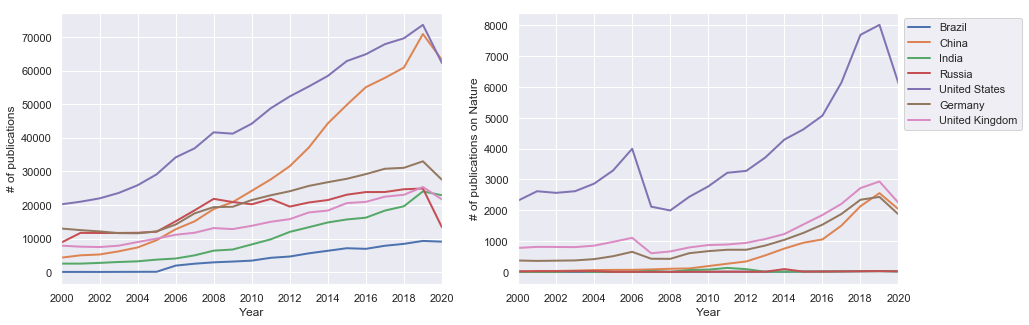

In [7]:
compare_publications(top_countries_df,countries_list,'','nature')

In total number of publications, China recently started to compete with the US. They are the leading countries in academic research. However, if we look at the plot on the right we see that the papers published on Nature journals are mostly from US authours. Since in general Nature has ["the finest peer-reviewed research in all fields of science and technology"](https://www.nature.com/nature/about), it seems that China still have a long road ahead to be the leading country in scientific research.

Now let's compare the countries by topic. First, we start by publications related to the Zika virus. Since Brazil was one of the countries where the pandemic spread and made a lot of [important contributions to the understanding of the virus](https://revistagalileu.globo.com/Revista/noticia/2017/11/zika-nos-lembrou-como-ciencia-de-nosso-pais-pode-ser-forte.html), I'm curious to see if the numbers of publications in this topic are better for Brazil.

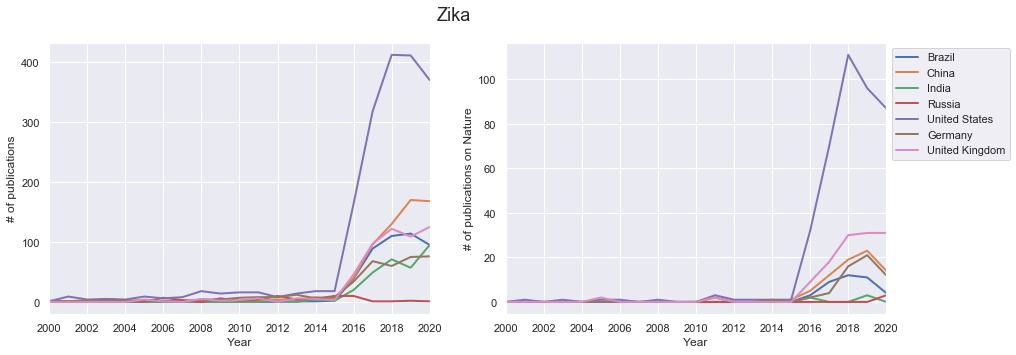

In [8]:
compare_publications(top_countries_df,countries_list,'zika','nature')

It seems that Brazil performed much better than average on the Zika virus problem. However, the US still dominated the scientific publications on this subject. Let's take a look on a more global visualization on the total number of papers published in this field (including countries not in countries_list)

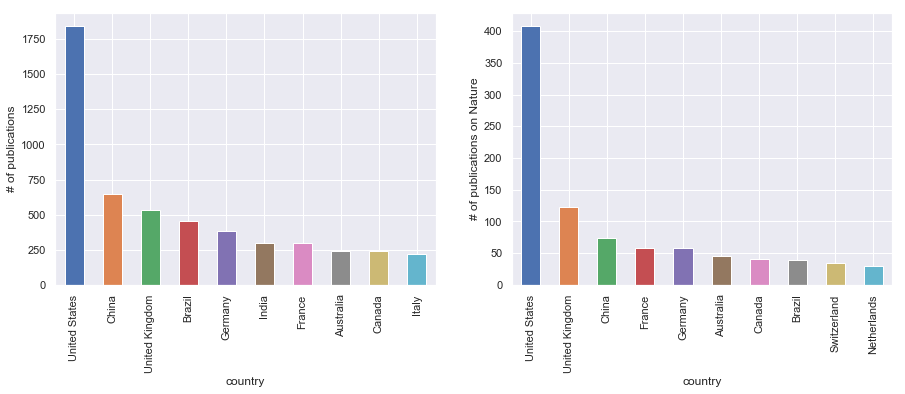

In [9]:
pubs_zika = top_countries_df.groupby('country')['publications_zika'].sum()
pubs_zika_nature = top_countries_df.groupby('country')['publications_zika_on_nature'].sum()
fig,ax = plt.subplots(1,2,figsize=(15,5))

pubs_zika.sort_values(ascending=False)[:10].plot(kind='bar',ax=ax[0])
pubs_zika_nature.sort_values(ascending=False)[:10].plot(kind='bar',ax=ax[1])
ax[0].set_ylabel('# of publications')
ax[1].set_ylabel('# of publications on Nature')

plt.show()

Brazil is the 4th place in total number of papers published in the field, but only 8th place for papers published in Nature journals.

Now let's take a look on publications related to my research areas, namely, photonics, plasmonics, graphene based materials and topological insulators.

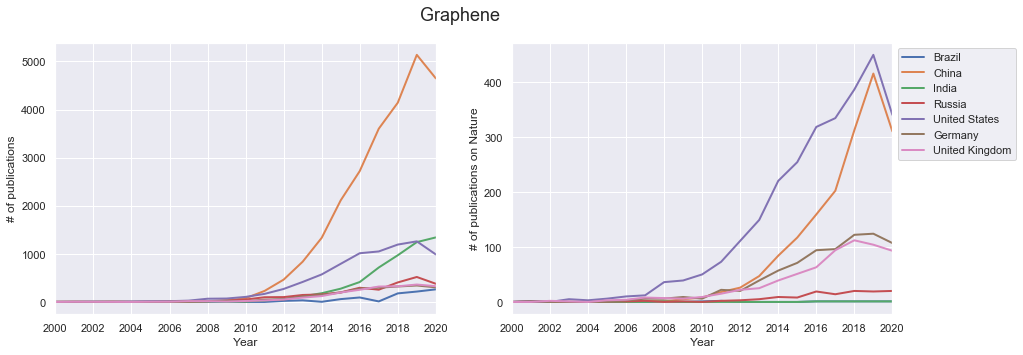

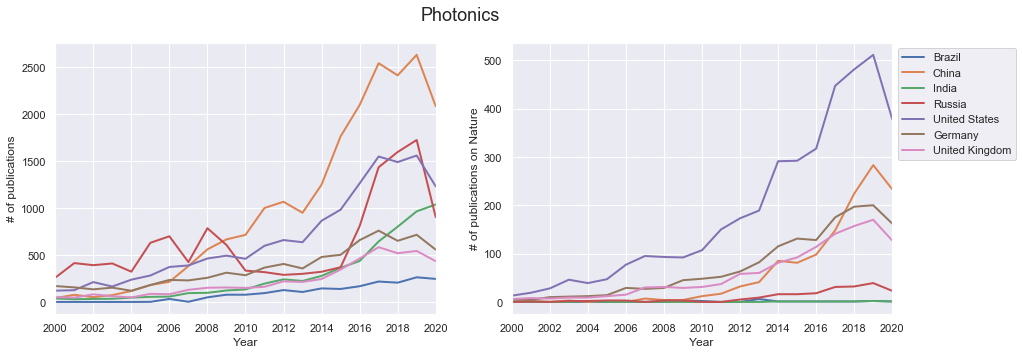

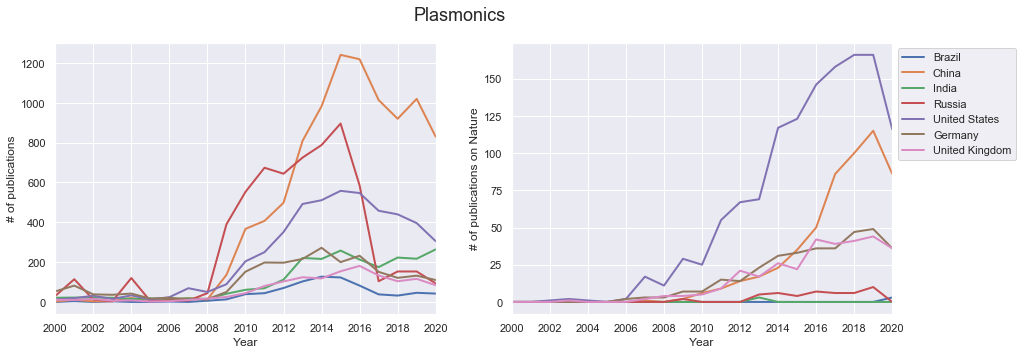

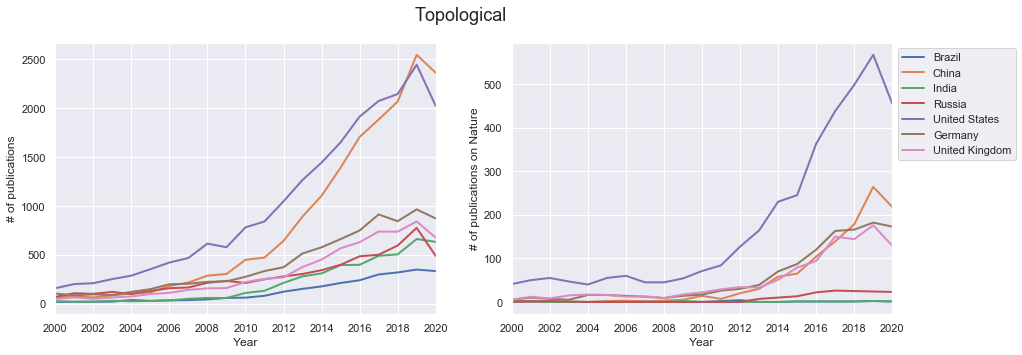

In [10]:
compare_publications(top_countries_df,countries_list,'graphene','nature')
compare_publications(top_countries_df,countries_list,'photonics','nature')
compare_publications(top_countries_df,countries_list,'plasmonics','nature')
compare_publications(top_countries_df,countries_list,'topological','nature')

It is interesting to see that the US is not so dominant in publications related to graphene. Brazil, however, barely appears in the plots.

**Coronavirus research:** The world is now living the terrible coronavirus pandemic, and the scientific community is working hard to understand the virus and develop a new vaccine. Let's see what are the top countries in coronavirus scientific publications up to now.

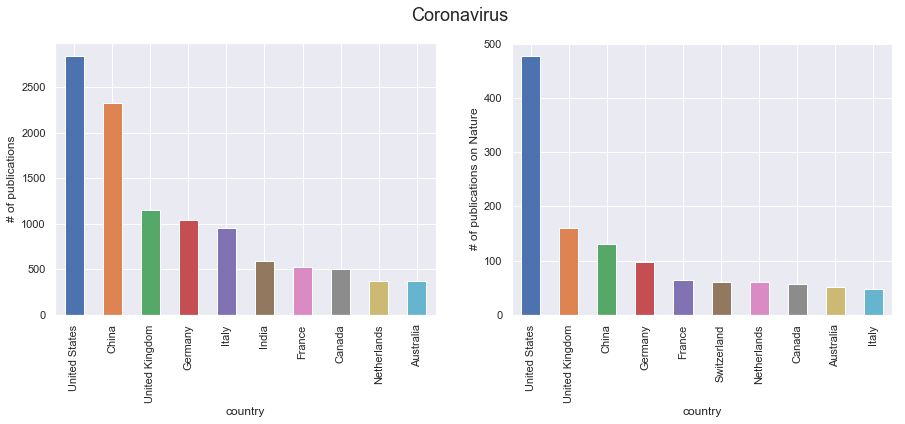

In [11]:
pubs_coronavirus = top_countries_df.groupby('country')['publications_coronavirus'].sum()
pubs_coronavirus_nature = top_countries_df.groupby('country')['publications_coronavirus_on_nature'].sum()
fig,ax = plt.subplots(1,2,figsize=(15,5))

pubs_coronavirus.sort_values(ascending=False)[:10].plot(kind='bar',ax=ax[0])
pubs_coronavirus_nature.sort_values(ascending=False)[:10].plot(kind='bar',ax=ax[1])

fig.suptitle('Coronavirus',fontsize=18)
ax[0].set_ylabel('# of publications')
ax[1].set_ylabel('# of publications on Nature')

plt.show()

Surprise! The US wins. But the UK is also doing a great job on this problem.

**Final comments:** this was a very simple analysis and I do not intend to draw any strong conclusions here since there are many other factors that should be considered when comparing the scientific research developed by different countries. The main purpose here was to practice getting information from the web using RESTful requests to an API service and do some analysis related to my domain of expertise. I hope to make further improvements in this project in the near future.